## A Few Techniques for Text Data Visualization

### A S M Shahadat Hossain
asmhossain20@gmail.com

Data Visualization is one of the most important subsets of Data Science. It refers to the graphical representation of Data. Majority of the data we generate and consume as human being are text data. Hence, this notebook is motivated to explore techniques for text data visualization and present a few of them.

### Word Cloud

This is one of the most common and frequently seen techniques now-a-days for text visualization. It works based on the **word frequency** in a particular dataset. Text pre-processing can play an important role here. It has been there around1976, however, became popular in 2006 from a tag cloud visualization used by Flickr (a photo-sharing site).

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import glob

# list all the text files 
files = glob.glob('*.txt')

data = ""

# read all the texts from the files listed and append them to a single variable
for file in files:
    with open(file, encoding='utf-8') as fp:
        data += fp.read()

# replace the new lines
data = data.replace("\n"," ")

data

'Research procedures and technical methods should be presented in sufficient detail to ensure scrutiny and reproducibility. We recognize that user data may be proprietary or confidential, but we encourage the sharing of (anonymized, cleaned) data sets, data collection procedures, and code. Research procedures and technical methods should be presented in sufficient detail to ensure scrutiny and reproducibility. Results should be clearly communicated and implications of the contributions/findings should be explicitly discussed.The SC Best Reproducibility Advancement Award aims to recognize outstanding efforts in improving transparency and reproducibility of methods for high performance computing, storage, networking and analysis. This award will recognize the paper or a research object of a paper that most significantly advances the state of art in transparency and reproducibility.   In this context, a research object refers to a collection of computational artifacts that extend beyond t

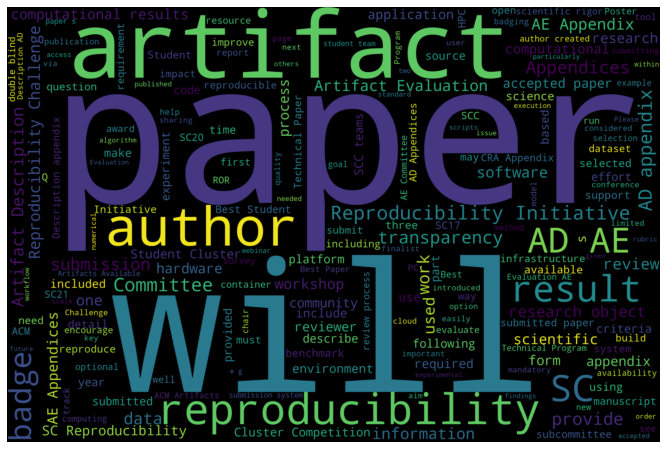

In [18]:
# set the stop words
stopwords = set(STOPWORDS)

# generate the word cloud
word_cloud = WordCloud(width = 3000, height = 2000,
                                        stopwords = stopwords,
                                        background_color ='black',
                                        min_font_size = 20).generate(data)

# visualize the word cloud
plt.figure( figsize = (16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Because this technique works solely based on the word frequency, it does not always guarantee to generate a meaningful insight from the data. For example, here I am injecting my name into the input data for 1000 times, and we will see that the updated word cloud will highlight my name. 

In [20]:
for i in range(1000):
    data_augmented += " Shahadat "

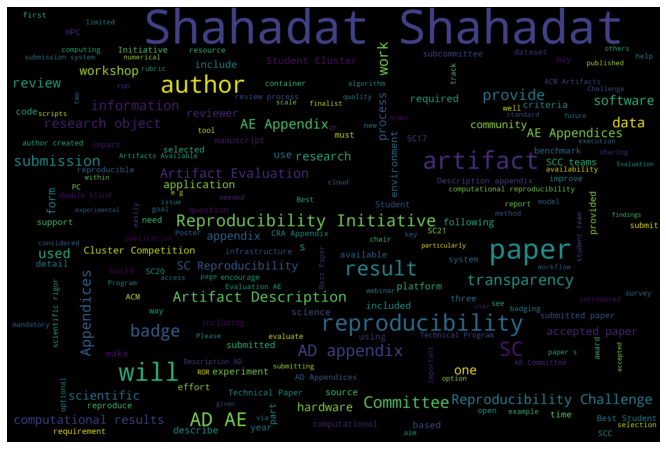

In [21]:
# set the stop words
stopwords = set(STOPWORDS)

# generate the word cloud
word_cloud = WordCloud(width = 3000, height = 2000,
                                        stopwords = stopwords,
                                        background_color ='black',
                                        min_font_size = 20).generate(data_augmented)

# visualize the word cloud
plt.figure( figsize = (16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It is showing my name twice probably (**bigram**) because of its **collocations** parameter. 

**References for Word Cloud:**
* https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
* https://www.datacamp.com/tutorial/wordcloud-python

### Sankey Diagram

This technique named after Captain Sankey is used to illustrate **flow**. The visualization is a collection of **nodes** and **links** where the **width of the links** represents a quantitative value such as rate of flow. It allows to show many to many relationships across domains.

In [1]:
# Source: https://plotly.com/python/sankey-diagram/ 

import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

It offers a number of customizations such as choosing colors, controlling labels, adjusting node positions and so on.

**References for Sankey Diagram:** 
* https://plotly.com/python/sankey-diagram/ 
* https://developers.google.com/chart/interactive/docs/gallery/sankey

### Word Tree

This technique is used to display parallel sequence of words. It can help understand collocation of words. 

  0%|          | 0/813 [00:00<?, ?it/s]

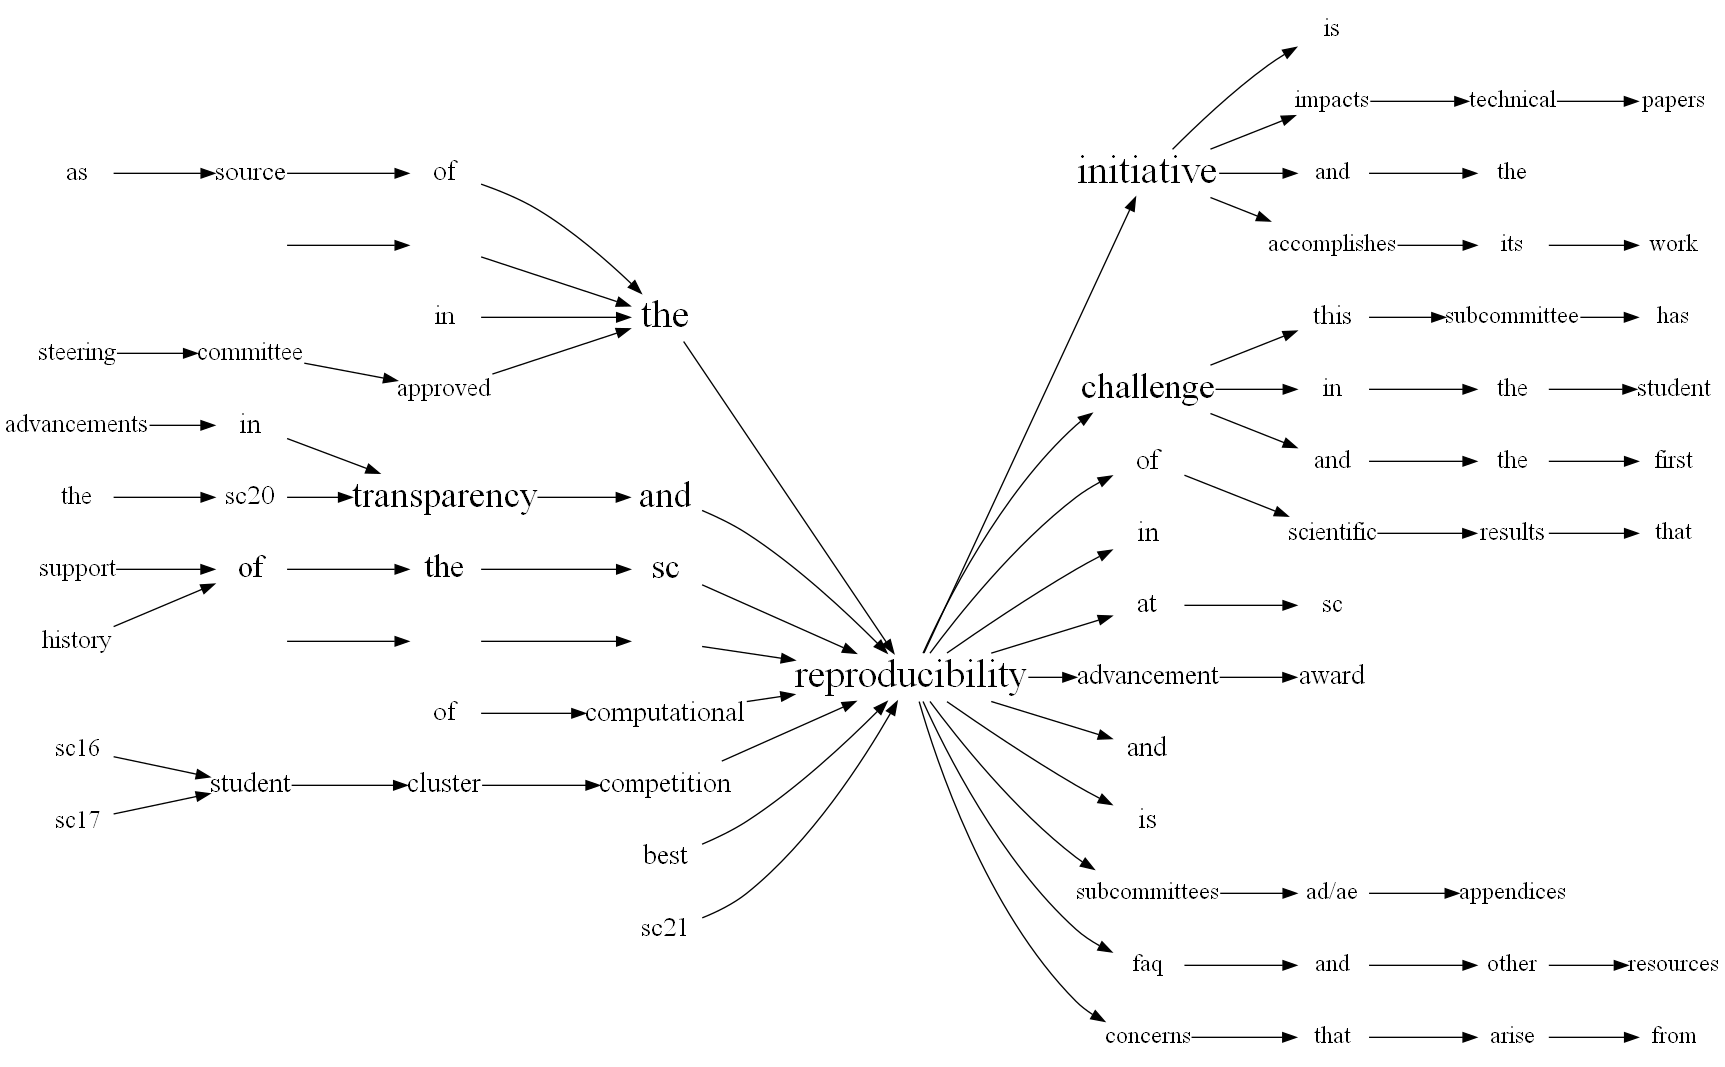

In [33]:
import os
import wordtree
from PIL import Image

# specify the path of Graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# making list of strings
data = data.split('.')

g = wordtree.search_and_draw(corpus = data, keyword = "reproducibility")
# create a file reproducibility.gv.png
g.render()  

image = Image.open("reproducibility.gv.png")
image

  0%|          | 0/19 [00:00<?, ?it/s]

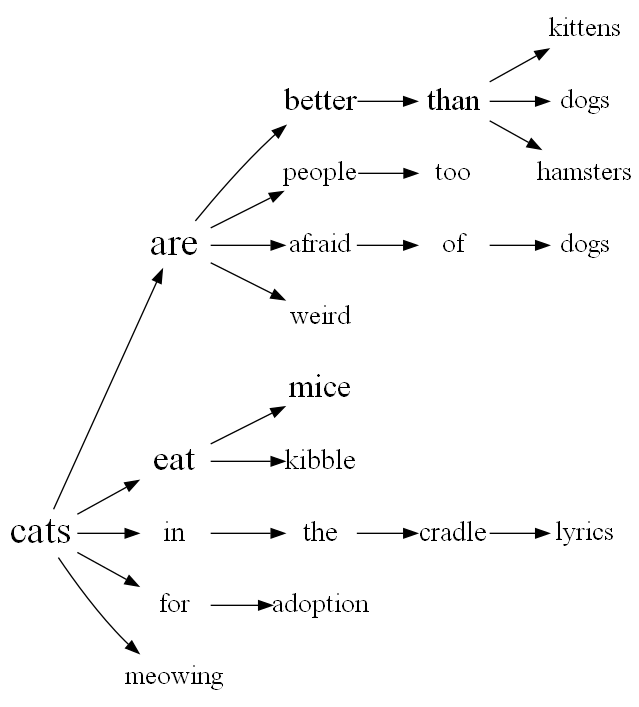

In [35]:
data = ['cats are better than dogs',
            'cats eat kibble',
            'cats are better than hamsters',
            'cats are awesome',
            'cats are people too',
            'cats eat mice',
            'cats meowing',
            'cats in the cradle',
            'cats eat mice',
            'cats in the cradle lyrics',
            'cats eat kibble',
            'cats for adoption',
            'cats are family',
            'cats eat mice',
            'cats are better than kittens',
            'cats are evil',
            'cats are weird',
            'cats eat mice']

g = wordtree.search_and_draw(corpus = data, keyword = "cats")
# create a file cats.gv.png
g.render()  


image = Image.open("cats.gv.png")
image

**References for Word Tree:** 
* https://github.com/willcrichton/wordtree
* https://developers.google.com/chart/interactive/docs/gallery/wordtree

### Other resources


* https://textvis.lnu.se/
* https://www.freewordcloudgenerator.com/
* https://courses.cs.washington.edu/courses/cse512/15sp/lectures/CSE512-Text.pdf